In [93]:
import numpy as np
import pandas as pd #library pra manipulação de dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras.utils import to_categorical

# Data analysis and Visualization

In [2]:
df = pd.read_csv("dataset_iris.csv") #read dataframe from csv file

In [3]:
df.head() #prints first 5 lines

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.info() #prints information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Features and Labels
X = FEATURES = CARACTERÍSTICAS

Y = LABELS = RÓTULOS

given x, neural network tries to predict y

In [5]:
df.pop("Id") # removes id column

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [6]:
features = list(df.columns[:-1])

In [7]:
species = { # dictionary for tokenization
    "Iris-setosa": 0,
    "Iris-virginica": 1,
    "Iris-versicolor": 2
}

In [8]:
sns.set_style("whitegrid")

# Dataset's label ratio

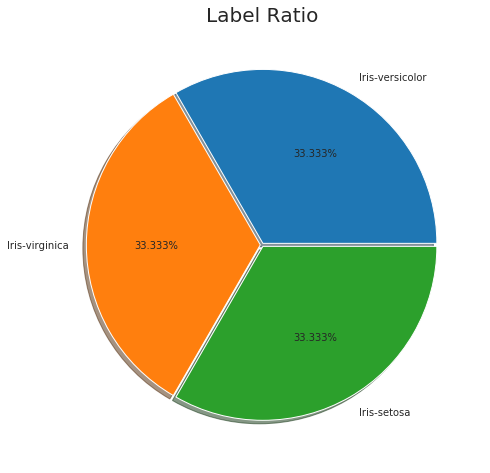

In [9]:
plt.figure(figsize=(15,8))
plt.title("Label Ratio", fontsize=20)
plt.pie(pd.value_counts(df["Species"]), explode=[.01,.01,.01], shadow=True, radius=1, autopct="%.3f%%", labels=pd.value_counts(df["Species"]).index)
plt.show()

## Correlation between Features

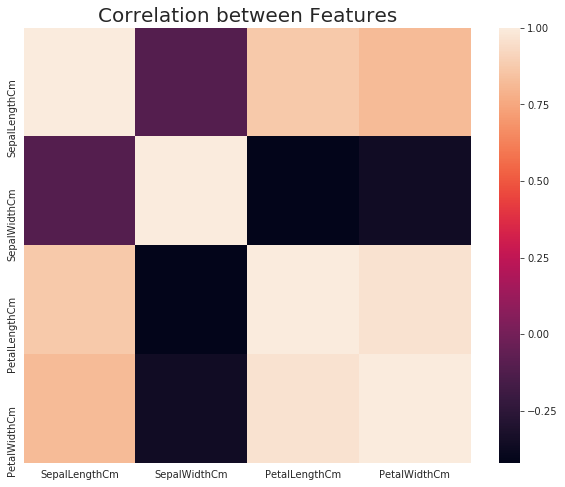

In [10]:
plt.figure(figsize=(10,8))
plt.title("Correlation between Features", fontsize=20)
sns.heatmap(df.corr(), )
plt.show()

## Coefficient of Variation

In [11]:
coefficient_of_variation = {}
for specie in species:
    coefficient_of_variation[specie] = {}
    for feature in features:
        coefficient_of_variation[specie][feature] = df[df["Species"] == specie][feature].std() / df[df["Species"] == specie][feature].mean()

In [12]:
coefficient_of_variation = pd.DataFrame.from_dict(coefficient_of_variation)
coefficient_of_variation *= 100

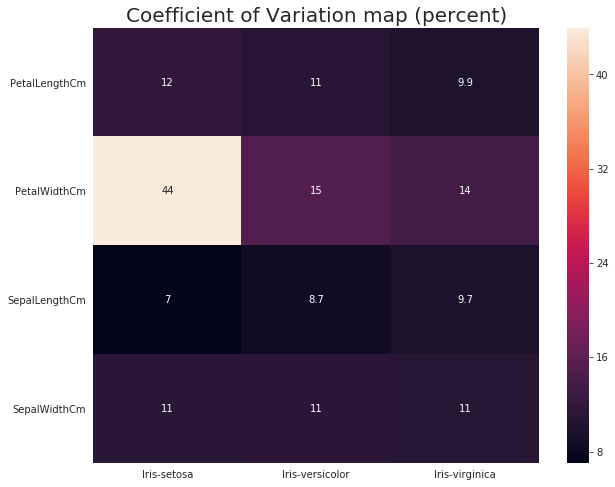

In [13]:
plt.figure(figsize=(10,8))

sns.heatmap(coefficient_of_variation, annot=True)

plt.yticks(rotation=0)
plt.title("Coefficient of Variation map (percent)", fontsize=20)

plt.show()

# Feature distribution by Label
this graph helps us visualize how each feature shows up in each label. This can be used to see possible kinds of feature relation abstractions.

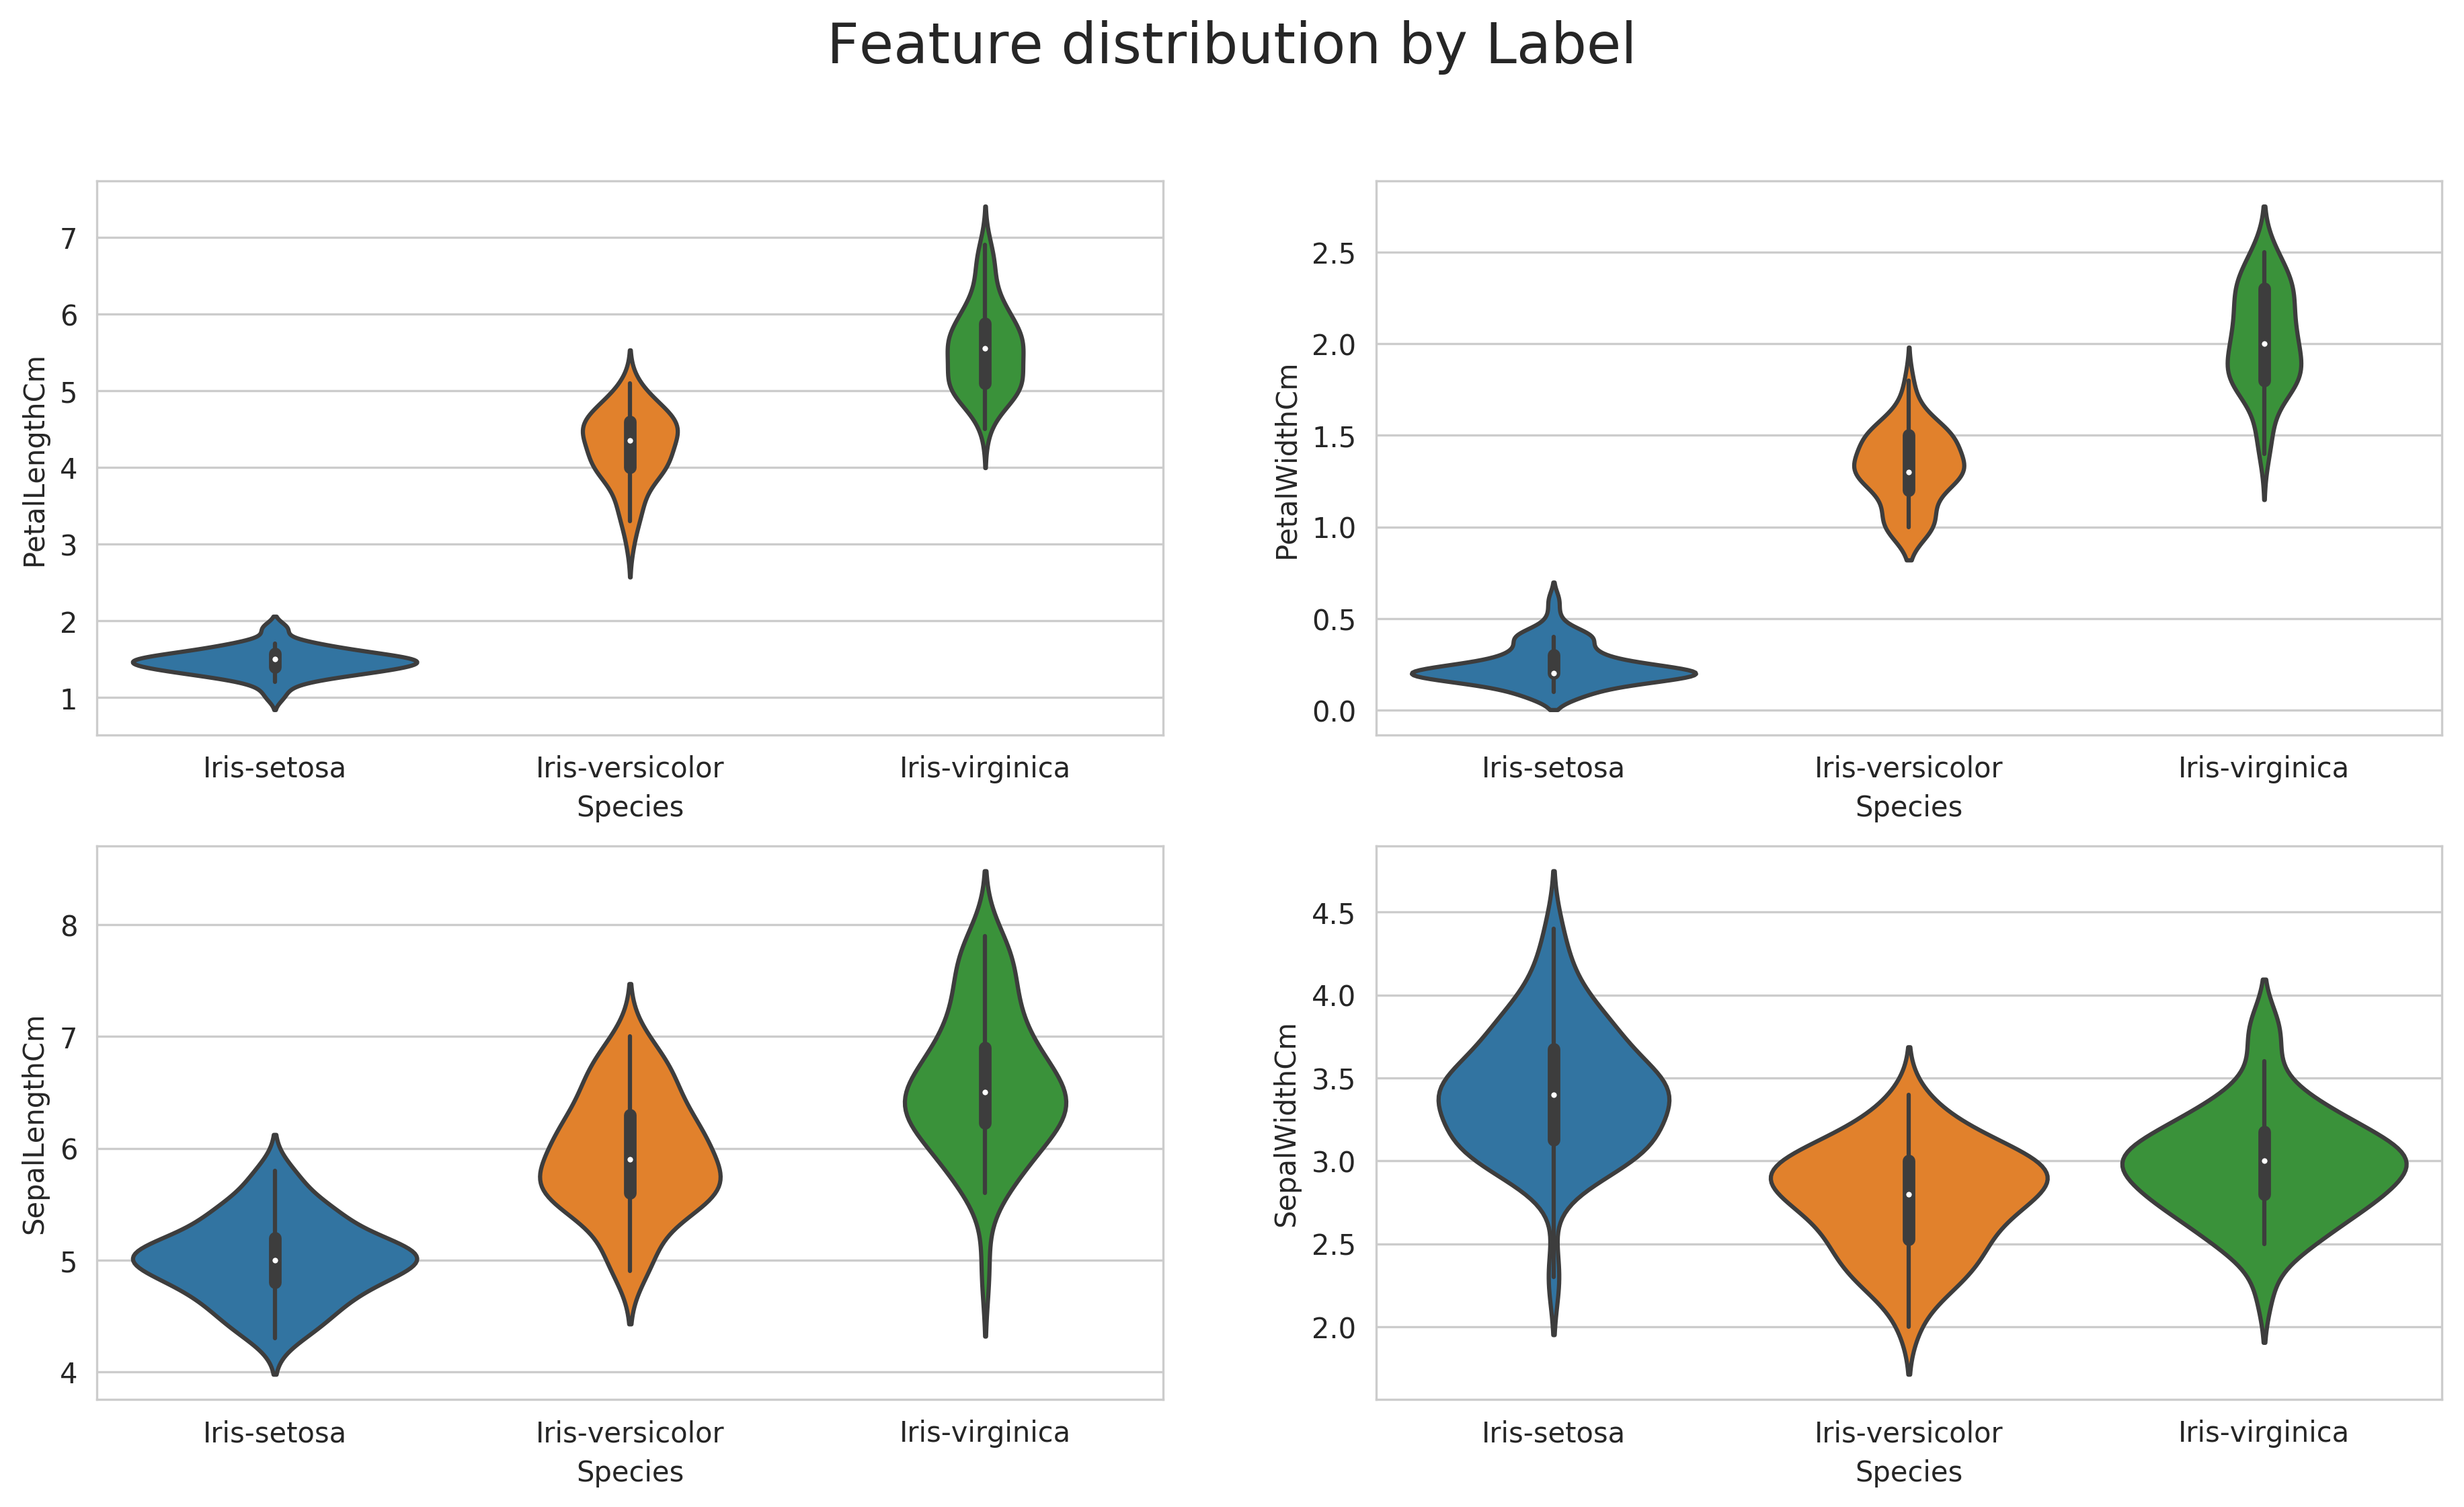

In [14]:
fig, axs = plt.subplots(2,2, figsize=(15,8), dpi=300)

plt.suptitle("Feature distribution by Label", fontsize=20)

sns.violinplot(data=df, x="Species", y="PetalLengthCm", ax=axs[0][0])
sns.violinplot(data=df, x="Species", y="PetalWidthCm", ax=axs[0][1])
sns.violinplot(data=df, x="Species", y="SepalLengthCm", ax=axs[1][0])
sns.violinplot(data=df, x="Species", y="SepalWidthCm", ax=axs[1][1])

plt.show()

# Feature mean by label

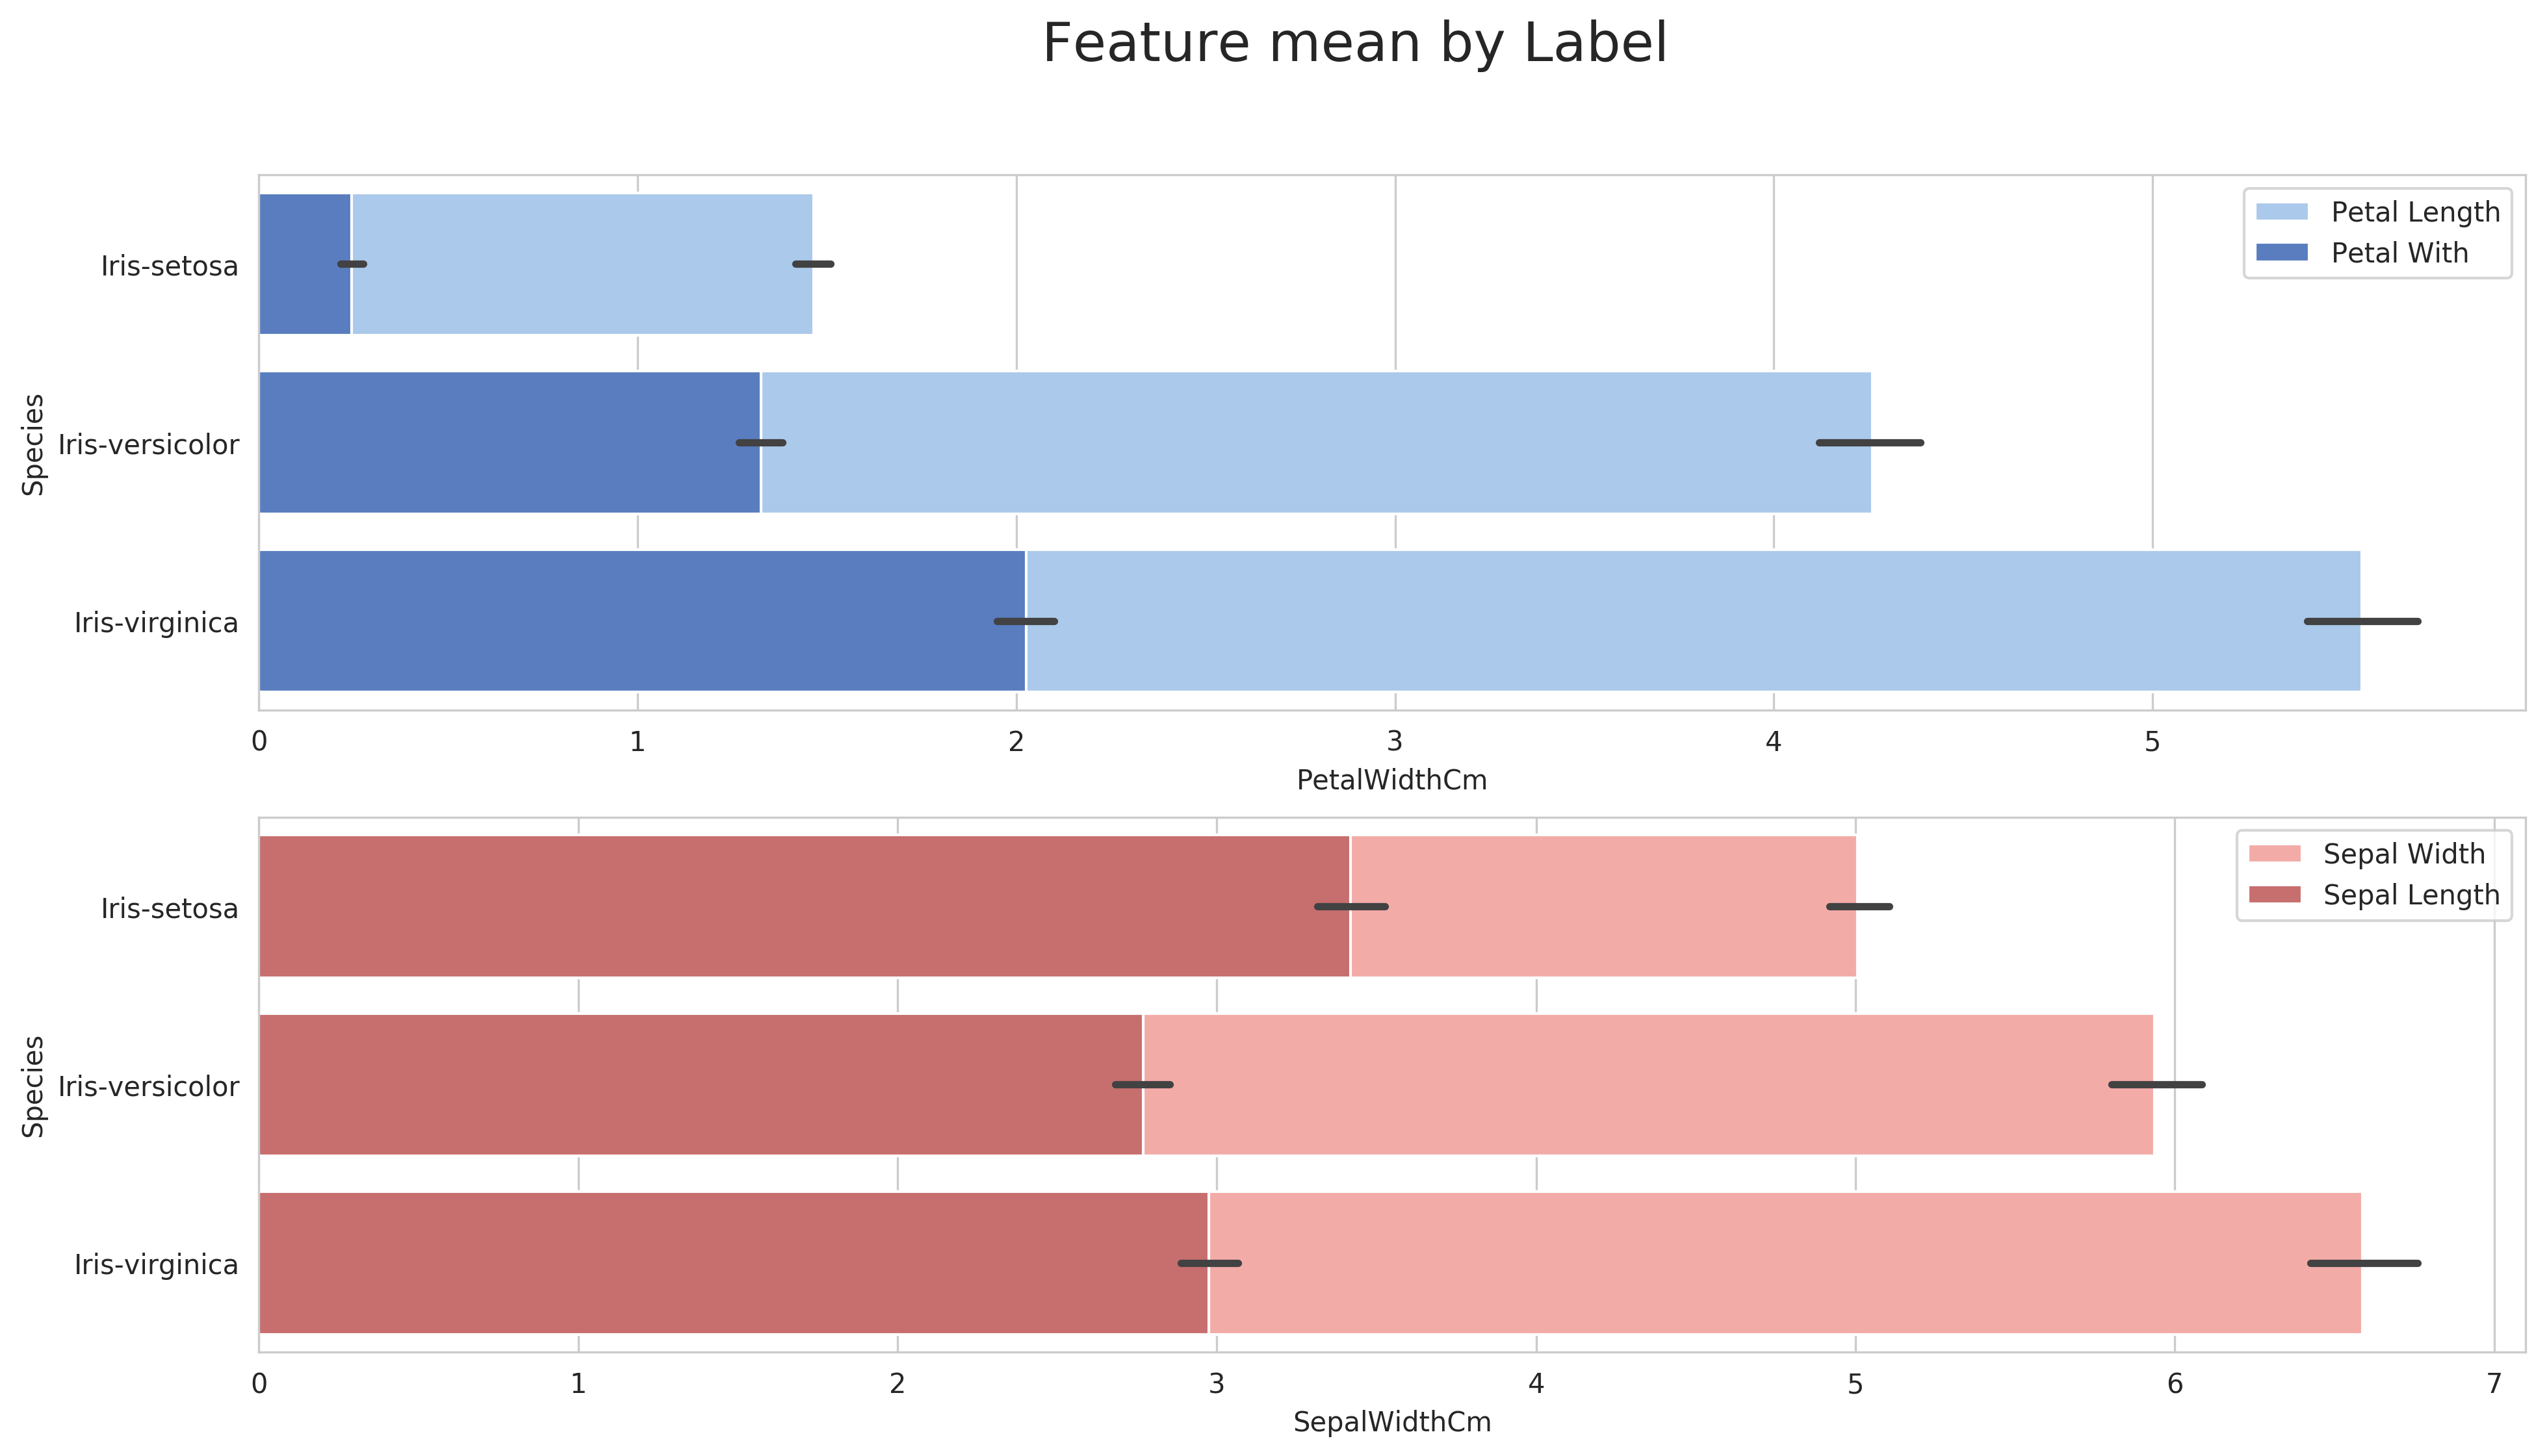

In [15]:
fig, axs = plt.subplots(2,1, figsize=(15,8), dpi=300)

plt.suptitle("Feature mean by Label", fontsize=20)

sns.set_color_codes("pastel")
sns.barplot(data=df, y="Species", x="PetalLengthCm", ax=axs[0], color="b", label="Petal Length")
sns.set_color_codes("muted")
sns.barplot(data=df, y="Species", x="PetalWidthCm", ax=axs[0], color="b", label="Petal With")
axs[0].legend()

sns.set_color_codes("pastel")
sns.barplot(data=df, y="Species", x="SepalLengthCm", ax=axs[1], color="r", label="Sepal Width")
sns.set_color_codes("muted")
sns.barplot(data=df, y="Species", x="SepalWidthCm", ax=axs[1], color="r", label="Sepal Length")
axs[1].legend()

plt.show()

In [16]:
virginica = df[df["Species"] == "Iris-virginica"]
setosa = df[df["Species"] == "Iris-setosa"]
versicolor = df[df["Species"] == "Iris-versicolor"]

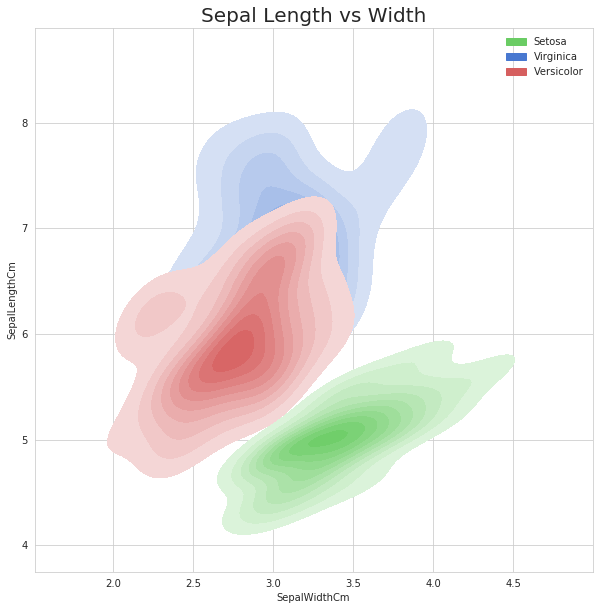

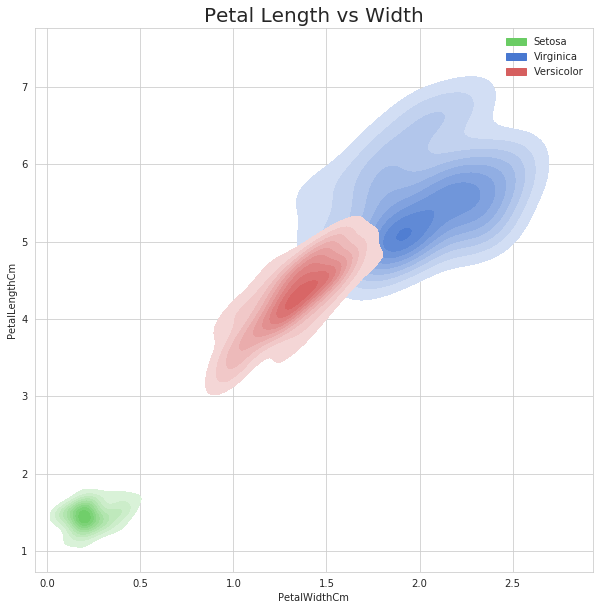

In [17]:
plt.figure(figsize=(10,10))

plt.title("Sepal Length vs Width", fontsize=20)

sns.kdeplot(setosa["SepalWidthCm"], setosa["SepalLengthCm"], shade=True, shade_lowest=False, color="g", label="Setosa")
sns.kdeplot(virginica["SepalWidthCm"], virginica["SepalLengthCm"], shade=True, shade_lowest=False, color="b", label="Virginica")
sns.kdeplot(versicolor["SepalWidthCm"], versicolor["SepalLengthCm"], shade=True, shade_lowest=False, color="r", label="Versicolor")

plt.legend(frameon=False)
plt.show()

#####################################################3

plt.figure(figsize=(10,10))

plt.title("Petal Length vs Width", fontsize=20)

sns.kdeplot(setosa["PetalWidthCm"], setosa["PetalLengthCm"], shade=True, shade_lowest=False, color="g", label="Setosa")
sns.kdeplot(virginica["PetalWidthCm"], virginica["PetalLengthCm"], shade=True, shade_lowest=False, color="b", label="Virginica")
sns.kdeplot(versicolor["PetalWidthCm"], versicolor["PetalLengthCm"], shade=True, shade_lowest=False, color="r", label="Versicolor")

plt.legend(frameon=False)
plt.show()

# Prepare Data

In [17]:
df = df.sample(frac=1).reset_index(drop=True)

In [18]:
species

{'Iris-setosa': 0, 'Iris-versicolor': 2, 'Iris-virginica': 1}

In [19]:
df = df.replace("Iris-virginica", species["Iris-virginica"])
df = df.replace("Iris-versicolor", species["Iris-versicolor"])
df = df.replace("Iris-setosa", species["Iris-setosa"])

In [20]:
for feature in features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

In [21]:
df.head(10)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      -0.776911      1.028611      -1.280118     -1.308593        0
1       0.068433     -0.124540       0.250129      0.394849        2
2      -1.018437      1.028611      -1.393470     -1.177559        0
3       0.309959     -0.585801       0.533509      0.001747        2
4       0.672249     -0.355171       0.306805      0.132781        2
5      -0.293857     -0.585801       0.646860      1.050019        1
6       0.068433     -0.124540       0.760212      0.787951        1
7      -1.139200     -0.124540      -1.336794     -1.308593        0
8       0.672249     -0.585801       1.043591      1.312087        1
9      -1.501490      0.797981      -1.336794     -1.177559        0

In [22]:
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [23]:
df["Species"]

0      0
1      2
2      0
3      2
4      2
      ..
145    2
146    2
147    0
148    1
149    2
Name: Species, Length: 150, dtype: int64

In [26]:
df[features[0]]

0     -0.776911
1      0.068433
2     -1.018437
3      0.309959
4      0.672249
         ...   
145   -0.173094
146   -0.414621
147   -1.622254
148    0.189196
149   -0.173094
Name: SepalLengthCm, Length: 150, dtype: float64

In [95]:
x = [[df["SepalLengthCm"][i], df["SepalWidthCm"][i], df["PetalLengthCm"][i], df["PetalWidthCm"][i]] for i in range(0,len(df))]
y = [[df["Species"][i]] for i in range(0,len(df))]

In [96]:
x = np.asarray(x)
y = to_categorical(y)


In [97]:
len(x)*.7

105.0

In [98]:
x_train = x[:int(len(x)*.7)]
x_val = x[:int(len(x)*.3)]
y_train = y[:int(len(y)*.7)]
y_val = y[:int(len(y)*.3)]

# Neural Network Development


In [94]:
# checkpoint = keras.callbacks.ModelCheckpoint("./weights/model_0.h5", monitor='val_acc', verbose=1, save_best_only=True)

In [103]:
model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(4,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

In [104]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [106]:
history = model.fit(x, y, batch_size=8, epochs=1000, validation_split=.3)

Train on 105 samples, validate on 45 samples
Epoch 1/1000
105/105 [==============================] - 0s 345us/step - loss: 0.0629 - acc: 0.9714 - val_loss: 0.0914 - val_acc: 0.9556
Epoch 2/1000
105/105 [==============================] - 0s 265us/step - loss: 0.0605 - acc: 0.9714 - val_loss: 0.0960 - val_acc: 0.9556
Epoch 3/1000
105/105 [==============================] - 0s 247us/step - loss: 0.0576 - acc: 0.9714 - val_loss: 0.1100 - val_acc: 0.9556
Epoch 4/1000
105/105 [==============================] - 0s 252us/step - loss: 0.0597 - acc: 0.9714 - val_loss: 0.0908 - val_acc: 0.9556
Epoch 5/1000
105/105 [==============================] - 0s 271us/step - loss: 0.0569 - acc: 0.9714 - val_loss: 0.0845 - val_acc: 0.9778
Epoch 6/1000
105/105 [==============================] - 0s 254us/step - loss: 0.0578 - acc: 0.9714 - val_loss: 0.0808 - val_acc: 0.9778
Epoch 7/1000
105/105 [==============================] - 0s 268us/step - loss: 0.0522 - acc: 0.9714 - val_loss: 0.1091 - val_acc: 0.9556
Epo

105/105 [==============================] - 0s 269us/step - loss: 0.0343 - acc: 0.9810 - val_loss: 0.0986 - val_acc: 0.9556
Epoch 61/1000
105/105 [==============================] - 0s 252us/step - loss: 0.0328 - acc: 0.9810 - val_loss: 0.1089 - val_acc: 0.9556
Epoch 62/1000
105/105 [==============================] - 0s 265us/step - loss: 0.0333 - acc: 0.9810 - val_loss: 0.0811 - val_acc: 0.9778
Epoch 63/1000
105/105 [==============================] - 0s 252us/step - loss: 0.0308 - acc: 0.9905 - val_loss: 0.0867 - val_acc: 0.9778
Epoch 64/1000
105/105 [==============================] - 0s 252us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0970 - val_acc: 0.9556
Epoch 65/1000
105/105 [==============================] - 0s 255us/step - loss: 0.0318 - acc: 0.9810 - val_loss: 0.0895 - val_acc: 0.9778
Epoch 66/1000
105/105 [==============================] - 0s 252us/step - loss: 0.0328 - acc: 0.9810 - val_loss: 0.0898 - val_acc: 0.9778
Epoch 67/1000
105/105 [==============================] 

Epoch 120/1000
105/105 [==============================] - 0s 290us/step - loss: 0.0193 - acc: 0.9905 - val_loss: 0.0960 - val_acc: 0.9778
Epoch 121/1000
105/105 [==============================] - 0s 285us/step - loss: 0.0193 - acc: 0.9905 - val_loss: 0.1362 - val_acc: 0.9556
Epoch 122/1000
105/105 [==============================] - 0s 267us/step - loss: 0.0209 - acc: 0.9905 - val_loss: 0.1233 - val_acc: 0.9556
Epoch 123/1000
105/105 [==============================] - 0s 260us/step - loss: 0.0207 - acc: 0.9905 - val_loss: 0.1139 - val_acc: 0.9556
Epoch 124/1000
105/105 [==============================] - 0s 259us/step - loss: 0.0211 - acc: 0.9905 - val_loss: 0.1147 - val_acc: 0.9556
Epoch 125/1000
105/105 [==============================] - 0s 292us/step - loss: 0.0203 - acc: 0.9905 - val_loss: 0.1248 - val_acc: 0.9556
Epoch 126/1000
105/105 [==============================] - 0s 255us/step - loss: 0.0175 - acc: 0.9905 - val_loss: 0.1343 - val_acc: 0.9556
Epoch 127/1000
105/105 [==========

105/105 [==============================] - 0s 276us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.1589 - val_acc: 0.9556
Epoch 180/1000
105/105 [==============================] - 0s 271us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.1848 - val_acc: 0.9556
Epoch 181/1000
105/105 [==============================] - 0s 239us/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.1886 - val_acc: 0.9556
Epoch 182/1000
105/105 [==============================] - 0s 268us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.1584 - val_acc: 0.9556
Epoch 183/1000
105/105 [==============================] - 0s 255us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.1618 - val_acc: 0.9556
Epoch 184/1000
105/105 [==============================] - 0s 253us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.1561 - val_acc: 0.9556
Epoch 185/1000
105/105 [==============================] - 0s 266us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.1511 - val_acc: 0.9556
Epoch 186/1000
105/105 [=========================

105/105 [==============================] - 0s 239us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.2099 - val_acc: 0.9556
Epoch 239/1000
105/105 [==============================] - 0s 266us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.2520 - val_acc: 0.9556
Epoch 240/1000
105/105 [==============================] - 0s 252us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2148 - val_acc: 0.9556
Epoch 241/1000
105/105 [==============================] - 0s 260us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.2434 - val_acc: 0.9556
Epoch 242/1000
105/105 [==============================] - 0s 260us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.2445 - val_acc: 0.9556
Epoch 243/1000
105/105 [==============================] - 0s 254us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.1854 - val_acc: 0.9556
Epoch 244/1000
105/105 [==============================] - 0s 262us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.2024 - val_acc: 0.9556
Epoch 245/1000
105/105 [=========================

105/105 [==============================] - 0s 268us/step - loss: 8.5861e-04 - acc: 1.0000 - val_loss: 0.2826 - val_acc: 0.9556
Epoch 298/1000
105/105 [==============================] - 0s 258us/step - loss: 7.4210e-04 - acc: 1.0000 - val_loss: 0.2694 - val_acc: 0.9556
Epoch 299/1000
105/105 [==============================] - 0s 272us/step - loss: 7.5859e-04 - acc: 1.0000 - val_loss: 0.3337 - val_acc: 0.9556
Epoch 300/1000
105/105 [==============================] - 0s 291us/step - loss: 7.9997e-04 - acc: 1.0000 - val_loss: 0.3665 - val_acc: 0.9556
Epoch 301/1000
105/105 [==============================] - 0s 284us/step - loss: 6.4975e-04 - acc: 1.0000 - val_loss: 0.2727 - val_acc: 0.9556
Epoch 302/1000
105/105 [==============================] - 0s 289us/step - loss: 7.3296e-04 - acc: 1.0000 - val_loss: 0.3063 - val_acc: 0.9556
Epoch 303/1000
105/105 [==============================] - 0s 278us/step - loss: 7.1573e-04 - acc: 1.0000 - val_loss: 0.2986 - val_acc: 0.9556
Epoch 304/1000
105/10

Epoch 355/1000
105/105 [==============================] - 0s 253us/step - loss: 8.9037e-05 - acc: 1.0000 - val_loss: 0.3708 - val_acc: 0.9556
Epoch 356/1000
105/105 [==============================] - 0s 262us/step - loss: 7.6912e-05 - acc: 1.0000 - val_loss: 0.4204 - val_acc: 0.9556
Epoch 357/1000
105/105 [==============================] - 0s 258us/step - loss: 1.3094e-04 - acc: 1.0000 - val_loss: 0.3924 - val_acc: 0.9556
Epoch 358/1000
105/105 [==============================] - 0s 304us/step - loss: 7.1126e-05 - acc: 1.0000 - val_loss: 0.4078 - val_acc: 0.9556
Epoch 359/1000
105/105 [==============================] - 0s 310us/step - loss: 7.5826e-05 - acc: 1.0000 - val_loss: 0.3751 - val_acc: 0.9556
Epoch 360/1000
105/105 [==============================] - 0s 301us/step - loss: 6.5721e-05 - acc: 1.0000 - val_loss: 0.4663 - val_acc: 0.9556
Epoch 361/1000
105/105 [==============================] - 0s 264us/step - loss: 8.4536e-05 - acc: 1.0000 - val_loss: 0.4212 - val_acc: 0.9556
Epoch 

Epoch 413/1000
105/105 [==============================] - 0s 253us/step - loss: 5.0446e-06 - acc: 1.0000 - val_loss: 0.3983 - val_acc: 0.9556
Epoch 414/1000
105/105 [==============================] - 0s 299us/step - loss: 3.5333e-06 - acc: 1.0000 - val_loss: 0.4169 - val_acc: 0.9556
Epoch 415/1000
105/105 [==============================] - 0s 300us/step - loss: 1.2052e-05 - acc: 1.0000 - val_loss: 0.4318 - val_acc: 0.9556
Epoch 416/1000
105/105 [==============================] - 0s 243us/step - loss: 3.2102e-06 - acc: 1.0000 - val_loss: 0.4182 - val_acc: 0.9556
Epoch 417/1000
105/105 [==============================] - 0s 265us/step - loss: 5.3377e-06 - acc: 1.0000 - val_loss: 0.4811 - val_acc: 0.9556
Epoch 418/1000
105/105 [==============================] - 0s 252us/step - loss: 6.2402e-06 - acc: 1.0000 - val_loss: 0.4686 - val_acc: 0.9556
Epoch 419/1000
105/105 [==============================] - 0s 233us/step - loss: 3.8648e-06 - acc: 1.0000 - val_loss: 0.4498 - val_acc: 0.9556
Epoch 

Epoch 471/1000
105/105 [==============================] - 0s 267us/step - loss: 3.6614e-07 - acc: 1.0000 - val_loss: 0.4575 - val_acc: 0.9556
Epoch 472/1000
105/105 [==============================] - 0s 263us/step - loss: 3.5422e-07 - acc: 1.0000 - val_loss: 0.3983 - val_acc: 0.9556
Epoch 473/1000
105/105 [==============================] - 0s 257us/step - loss: 4.1213e-07 - acc: 1.0000 - val_loss: 0.4375 - val_acc: 0.9556
Epoch 474/1000
105/105 [==============================] - 0s 264us/step - loss: 4.5981e-07 - acc: 1.0000 - val_loss: 0.4055 - val_acc: 0.9556
Epoch 475/1000
105/105 [==============================] - 0s 271us/step - loss: 4.0985e-07 - acc: 1.0000 - val_loss: 0.3828 - val_acc: 0.9556
Epoch 476/1000
105/105 [==============================] - 0s 267us/step - loss: 3.2016e-07 - acc: 1.0000 - val_loss: 0.4286 - val_acc: 0.9556
Epoch 477/1000
105/105 [==============================] - 0s 259us/step - loss: 5.2850e-07 - acc: 1.0000 - val_loss: 0.4102 - val_acc: 0.9556
Epoch 

Epoch 529/1000
105/105 [==============================] - 0s 244us/step - loss: 1.2943e-07 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 0.9556
Epoch 530/1000
105/105 [==============================] - 0s 266us/step - loss: 1.5724e-07 - acc: 1.0000 - val_loss: 0.3601 - val_acc: 0.9778
Epoch 531/1000
105/105 [==============================] - 0s 246us/step - loss: 1.3170e-07 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.9778
Epoch 532/1000
105/105 [==============================] - 0s 267us/step - loss: 1.4873e-07 - acc: 1.0000 - val_loss: 0.3600 - val_acc: 0.9778
Epoch 533/1000
105/105 [==============================] - 0s 263us/step - loss: 1.3283e-07 - acc: 1.0000 - val_loss: 0.3613 - val_acc: 0.9778
Epoch 534/1000
105/105 [==============================] - 0s 256us/step - loss: 1.3283e-07 - acc: 1.0000 - val_loss: 0.3614 - val_acc: 0.9778
Epoch 535/1000
105/105 [==============================] - 0s 242us/step - loss: 1.3113e-07 - acc: 1.0000 - val_loss: 0.3639 - val_acc: 0.9778
Epoch 

Epoch 587/1000
105/105 [==============================] - 0s 230us/step - loss: 1.2034e-07 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.9778
Epoch 588/1000
105/105 [==============================] - 0s 254us/step - loss: 1.2148e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 589/1000
105/105 [==============================] - 0s 257us/step - loss: 1.2602e-07 - acc: 1.0000 - val_loss: 0.3603 - val_acc: 0.9778
Epoch 590/1000
105/105 [==============================] - 0s 261us/step - loss: 1.2262e-07 - acc: 1.0000 - val_loss: 0.3596 - val_acc: 0.9778
Epoch 591/1000
105/105 [==============================] - 0s 261us/step - loss: 1.2148e-07 - acc: 1.0000 - val_loss: 0.3598 - val_acc: 0.9778
Epoch 592/1000
105/105 [==============================] - 0s 271us/step - loss: 1.2489e-07 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.9778
Epoch 593/1000
105/105 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.9778
Epoch 

Epoch 645/1000
105/105 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 646/1000
105/105 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 647/1000
105/105 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 648/1000
105/105 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 649/1000
105/105 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 650/1000
105/105 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 651/1000
105/105 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 

Epoch 703/1000
105/105 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 704/1000
105/105 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 705/1000
105/105 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 706/1000
105/105 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 707/1000
105/105 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 708/1000
105/105 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 709/1000
105/105 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 

Epoch 761/1000
105/105 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 762/1000
105/105 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 763/1000
105/105 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 764/1000
105/105 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 765/1000
105/105 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 766/1000
105/105 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 767/1000
105/105 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 

Epoch 819/1000
105/105 [==============================] - 0s 350us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 820/1000
105/105 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 821/1000
105/105 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 822/1000
105/105 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 823/1000
105/105 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 824/1000
105/105 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 825/1000
105/105 [==============================] - 0s 246us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 

Epoch 877/1000
105/105 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 878/1000
105/105 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 879/1000
105/105 [==============================] - 0s 343us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 880/1000
105/105 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 881/1000
105/105 [==============================] - 0s 334us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 882/1000
105/105 [==============================] - 0s 334us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 883/1000
105/105 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 

Epoch 935/1000
105/105 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 936/1000
105/105 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 937/1000
105/105 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 938/1000
105/105 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 939/1000
105/105 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 940/1000
105/105 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 941/1000
105/105 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 

Epoch 993/1000
105/105 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 994/1000
105/105 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 995/1000
105/105 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 996/1000
105/105 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 997/1000
105/105 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 998/1000
105/105 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 999/1000
105/105 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.3583 - val_acc: 0.9778
Epoch 